Sequences of Damped Sine Waves

In [1]:
from math import sin
from math import pi
from math import exp
from random import randint
from random import uniform
from numpy import array
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
%matplotlib inline 

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# generate damped sine wave in [0,1]
def generate_sequence(length, period, decay):
  return [0.5 + 0.5 * sin(2 * pi * i / period) * exp(-decay * i) for i in range(length)]
# generate input and output pairs of damped sine waves
def generate_examples(length, n_patterns, output):
    X, y = list(), list()
    for _ in range(n_patterns):
        p = randint(10, 20)
        d = uniform(0.01, 0.1)
        sequence = generate_sequence(length + output, p, d)
        X.append(sequence[:-output])
        y.append(sequence[-output:])
    X = array(X).reshape(n_patterns, length, 1)
    y = array(y).reshape(n_patterns, output)
    return X, y

In [5]:
# test problem generation
X, y = generate_examples(20, 5, 5)


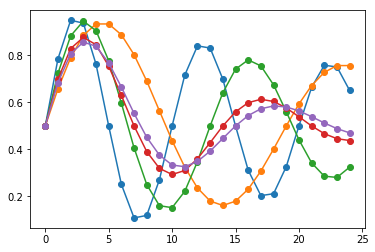

In [6]:
for i in range(len(X)):
    pyplot.plot([x for x in X[i, :, 0]] + [x for x in y[i]], '-o') 
pyplot.show()

In [7]:
# configure problem
length = 50
output = 5

To stack LSTM layers, we need to change the configuration of the prior LSTM layer to output a 3D array as input for the subsequent layer. <br/>
We can do this by setting the return sequences argument on the layer to True (defaults to False). <br/>
This will return one output for each input time step and provide a 3D array.

In [8]:
# define model
model = Sequential()
model.add(LSTM(20, return_sequences=True, input_shape=(length, 1))) 
model.add(LSTM(20))
model.add(Dense(output))
model.compile(loss='mae', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 20)            1760      
_________________________________________________________________
lstm_2 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 105       
Total params: 5,145
Trainable params: 5,145
Non-trainable params: 0
_________________________________________________________________


In [9]:
# fit model
X, y = generate_examples(length, 10000, output)
history = model.fit(X, y, batch_size=10, epochs=1)

Epoch 1/1
10000/10000 [==============================] - 72s 7ms/step - loss: 0.0424


In [10]:
# evaluate model
X, y = generate_examples(length, 1000, output) 
loss = model.evaluate(X, y, verbose=0) 
print('MAE: %f' % loss)

MAE: 0.016820


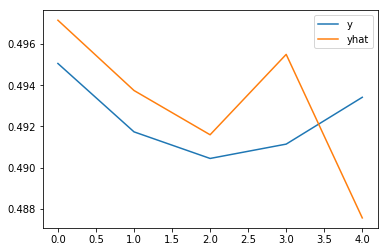

In [11]:
# prediction on new data
X, y = generate_examples(length, 1, output)
yhat = model.predict(X, verbose=0) 
pyplot.plot(y[0], label='y') 
pyplot.plot(yhat[0], label='yhat') 
pyplot.legend()
pyplot.show()

In [12]:
X, y

(array([[[0.5       ],
         [0.70114037],
         [0.83604303],
         [0.88851707],
         [0.86021847],
         [0.76783202],
         [0.63780932],
         [0.5       ],
         [0.38153493],
         [0.3020817 ],
         [0.27117621],
         [0.28784316],
         [0.34225574],
         [0.41883484],
         [0.5       ],
         [0.56977203],
         [0.61656738],
         [0.6347697 ],
         [0.62495341],
         [0.59290619],
         [0.54780361],
         [0.5       ],
         [0.45890656],
         [0.43134564],
         [0.42062508],
         [0.42640655],
         [0.44528131],
         [0.47184524],
         [0.5       ],
         [0.52420268],
         [0.54043516],
         [0.54674922],
         [0.54334413],
         [0.53222751],
         [0.51658223],
         [0.5       ],
         [0.48574541],
         [0.47618502],
         [0.47246624],
         [0.47447173],
         [0.48101905],
         [0.49023361],
         [0.5       ],
         [0